In [1]:
import model as wobble_model

In [2]:
model_name = 'out/model2M14371943+5754143._l0_r6000_mI256_2mI256_chi_s300.0_rs40000.pt'
model = wobble_model.load(model_name)

In [5]:
import astropy.table as at
import dataset as wobble_data

In [7]:
filename = 'data/2M03322788-0658199.fits'
tbl     = at.QTable.read(filename)

In [8]:
flux = tbl['flux']
lamb = tbl['wavelength']
ferr = tbl['flux_err']
mask = tbl['mask']

In [11]:
import numpy as np

In [12]:
sigma = 80
flux       = wobble_data.interpolate_mask(flux,mask)
flux_norm  = wobble_data.normalize_flux(flux,sigma)
x, y, yerr = np.log(lamb), np.log(flux_norm), ferr/flux
y, yerr    = wobble_data.set_masked(y,yerr,mask)
epoches    = y.shape[0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [14]:
import matplotlib.pyplot as plt

In [22]:
model[1].bool

True

2.8838336


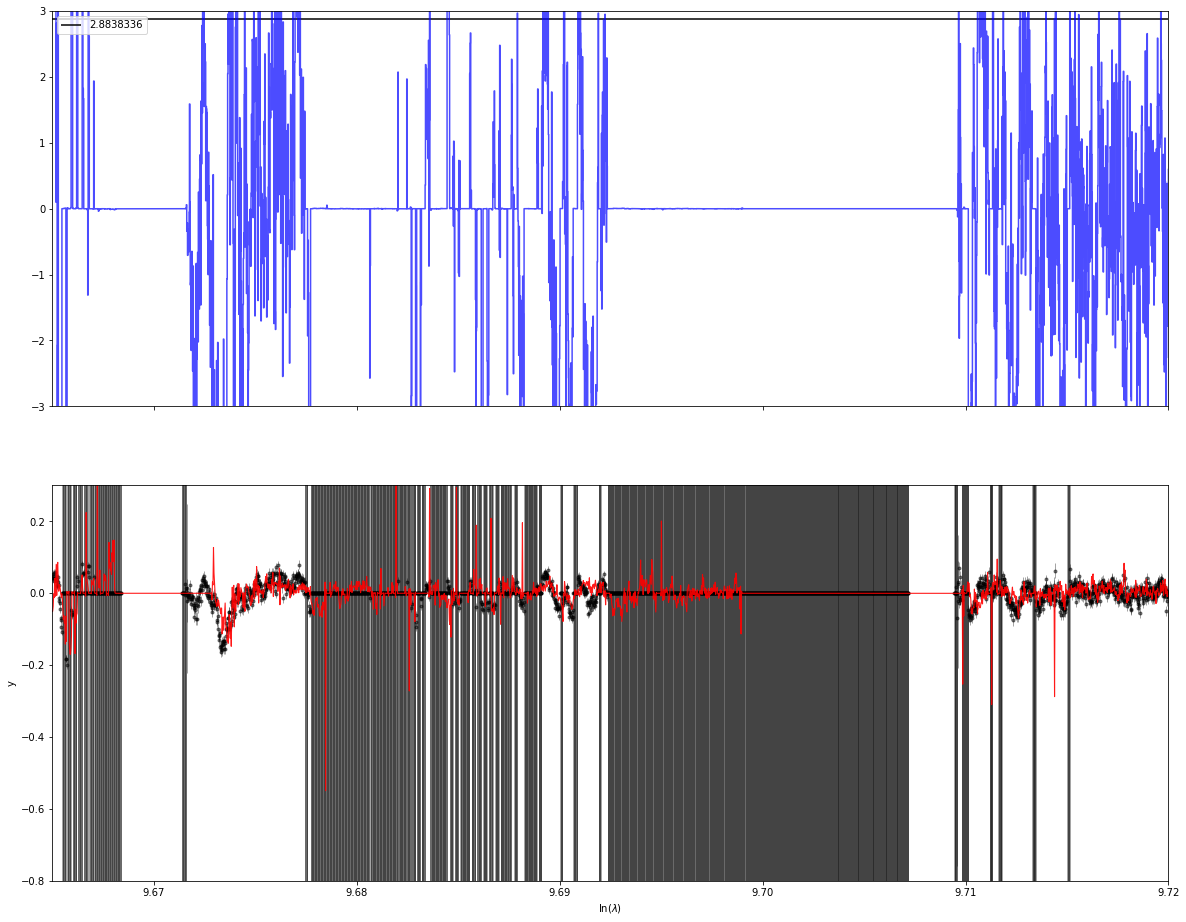

In [29]:
epoch_idx = 11
residuals = (y[epoch_idx,:] - model(model.p,x[epoch_idx,:],i=epoch_idx)) / yerr[epoch_idx,:]

rms_chi = np.sqrt(np.mean(residuals ** 2))
print(rms_chi)

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(20,16),sharey=False,sharex=True)
ax[0].step(x[epoch_idx,:],residuals,where='mid',color='b',alpha=0.7)
hline_1 = ax[0].hlines(rms_chi,np.min(x[epoch_idx,:]),np.max(x[epoch_idx,:]))
ax[0].legend([hline_1],[rms_chi])
ax[0].set_ylim(-3,3)

ax[1].set_xlabel('ln($\lambda$)')
ax[1].set_ylabel('y')
ax[1].errorbar(x[epoch_idx,:],y[epoch_idx,:],yerr[epoch_idx,:],fmt='.k',elinewidth=0.7,zorder=1,alpha=0.5,ms=6)
ax[1].plot(model[1].xs-model[0].deltas[epoch_idx],model[1].theta,'r',linestyle='solid',linewidth=1.1,zorder=2,alpha=0.9,ms=6)
ax[1].set_ylim(-0.8,0.3)

xmin = 9.665
xmax = 9.720
plt.xlim(xmin,xmax)
plt.show()